## Pandas GroupBy Operations

### Understanding groupby objects

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [ ]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [ ]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


groupby()

In [ ]:
titanic_slice.groupby('sex')   # it's a groupby object

In [ ]:
gbo = titanic_slice.groupby('sex')

In [ ]:
type(gbo)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
gbo.groups    # accessing the groups within gbo

{'female': [1, 2, 3, 8, 9], 'male': [0, 4, 5, 6, 7]}

In [ ]:
l = list(gbo)   # passing it to a list

In [ ]:
l

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [ ]:
len(l)

2

In [ ]:
l[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [ ]:
type(l[0])

tuple

In [ ]:
l[0][0]  # string 

'female'

In [ ]:
l[0][1]  # second element in the first tuple is a dataframe

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [ ]:
l[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [ ]:
titanic_slice_f = titanic_slice.loc[titanic_slice.sex == 'female']
titanic_slice_f

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [ ]:
titanic_slice_m = titanic_slice.loc[titanic_slice.sex == 'male']
titanic_slice_m

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [ ]:
titanic_slice_f.equals(l[0][1])   # both are same!

True

In [ ]:
for x in gbo:       # printing the dataframes within gbo which are at index 1 in each tuple
    print(x[1])

      sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0
    sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0


## Splitting with many keys

In [ ]:
summer = pd.read_csv('summer.csv')
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [ ]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [ ]:
summer.Country.nunique()

147

In [ ]:
split1 = summer.groupby('Country')   # splitting into countries

In [ ]:
l = list(split1)    # in this list, there are 147 tuples with first element as the country name and second as the corresponding dataframe

In [ ]:
len(l)

147

In [ ]:
l[100][1]    #101th country with all details

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5031,1928,Amsterdam,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5741,1932,Los Angeles,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5889,1932,Los Angeles,Athletics,Athletics,"TORIBIO, Simeon Galvez",PHI,Men,High Jump,Bronze
5922,1932,Los Angeles,Boxing,Boxing,"VILLANUEVA, Jose",PHI,Men,50.8 - 54KG (Bantamweight),Bronze
6447,1936,Berlin,Athletics,Athletics,"WHITE, Miguel S.",PHI,Men,400M Hurdles,Bronze
11005,1964,Tokyo,Boxing,Boxing,"VILLANUEVA, Anthony N.",PHI,Men,54 - 57KG (Featherweight),Silver
18513,1988,Seoul,Boxing,Boxing,"SERANTES, Leopoldo",PHI,Men,- 48KG (Light-Flyweight),Bronze
20184,1992,Barcelona,Boxing,Boxing,"VELASCO, Roel",PHI,Men,- 48KG (Light-Flyweight),Bronze
21927,1996,Atlanta,Boxing,Boxing,"VELASCO, Mansueto",PHI,Men,- 48KG (Light-Flyweight),Silver


splitting with 2 columns using 'by' param

In [ ]:
split2 = summer.groupby(by = ['Country', 'Gender'])   

In [ ]:
l2 = list(split2) # in this list, there are 147 tuples with first element as the (country name, gender) and second as the corresponding dataframe

In [ ]:
len(l2)

236

In [ ]:
l2[104]

(('IRL', 'Women'),
        Year     City      Sport Discipline                Athlete Country  \
 21356  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21369  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21375  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21381  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 23627  2000   Sydney  Athletics  Athletics      O'SULLIVAN, Sonia     IRL   
 29896  2012   London     Boxing     Boxing          TAYLOR, Katie     IRL   
 
       Gender                   Event   Medal  
 21356  Women          200M Butterfly  Bronze  
 21369  Women  200M Individual Medley    Gold  
 21375  Women          400M Freestyle    Gold  
 21381  Women  400M Individual Medley    Gold  
 23627  Women                   5000M  Silver  
 29896  Women                   60 KG    Gold  )

In [ ]:
l2[104][0]   # first element

('IRL', 'Women')

In [ ]:
l2[104][1]   # second element, the dataframe

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21356,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Butterfly,Bronze
21369,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Individual Medley,Gold
21375,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Freestyle,Gold
21381,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Individual Medley,Gold
23627,2000,Sydney,Athletics,Athletics,"O'SULLIVAN, Sonia",IRL,Women,5000M,Silver
29896,2012,London,Boxing,Boxing,"TAYLOR, Katie",IRL,Women,60 KG,Gold


## split-apply-combine explained


we apply a fxn to our split dataframe in this.

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic_slice = titanic.iloc[:10, [2,3]]  
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [4]:
list(titanic_slice.groupby('sex'))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [6]:
list(titanic_slice.groupby('sex'))[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [7]:
titanic_slice.groupby('sex').mean()   # applying mean to the dataset, adjusting for NaN is done automatically.

,age
sex,
female,28.00
male,28.25


In [8]:
titanic.groupby('sex').sum()    # applying on the whole dataset and not the slice

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


In [10]:
titanic.groupby('sex').survived.sum()    # method chaining

sex
female    233
male      109
Name: survived, dtype: int64

In [12]:
titanic.groupby('sex')[['fare','age' ]].sum()

,fare,age
sex,,
female,13966.6628,7286.00
male,14727.2865,13919.17


In [14]:
new_df = titanic.groupby('sex').mean()
new_df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

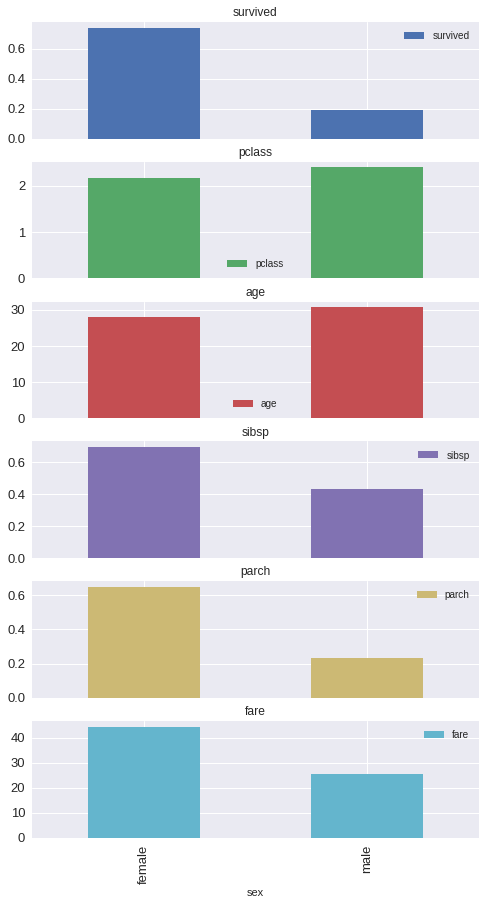

In [16]:
new_df.plot(kind = 'bar', subplots = True, figsize =(8,15), fontsize = 13)
plt.show()

## split-apply-combine applied


In [1]:
import pandas as pd
summer = pd.read_csv('summer.csv')
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [2]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [11]:
medals_per_country = summer.groupby('Country').Medal.count().nlargest(n=20)
medals_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn')

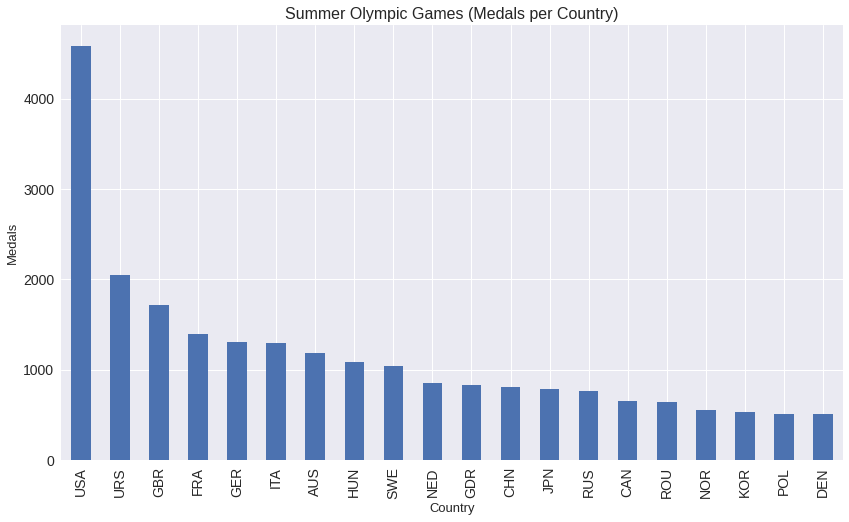

In [13]:
medals_per_country.plot(kind = 'bar', figsize = (14,8), fontsize = 14)
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Medals', fontsize = 13)
plt.title('Summer Olympic Games (Medals per Country)', fontsize = 16)
plt.show()

In [14]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [16]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


finding out the avg fare by each class.

In [17]:
titanic.groupby('pclass').fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [18]:
titanic.survived.sum()

342

In [19]:
titanic.survived.mean()     # 38% survival rate

0.3838383838383838

In [20]:
titanic.groupby('sex').survived.mean()   # women were more likely to survive

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [21]:
titanic.groupby('pclass').survived.mean()     # class matters!!

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [22]:
titanic['ad_chil']  = 'adult'    # a new column to diff b/w adult and children

In [23]:
titanic.loc[titanic.age < 18, 'ad_chil'] = 'child'

In [26]:
titanic.groupby('ad_chil').survived.mean()   # children were more likely to survive

ad_chil
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [29]:
titanic.ad_chil.value_counts()

adult    778
child    113
Name: ad_chil, dtype: int64

In [32]:
titanic.groupby(['sex', 'ad_chil']).survived.mean()  

sex     ad_chil
female  adult      0.752896
        child      0.690909
male    adult      0.165703
        child      0.396552
Name: survived, dtype: float64

In [33]:
w_and_c_first = titanic.groupby(['sex', 'ad_chil']).survived.mean().sort_values(ascending = False)

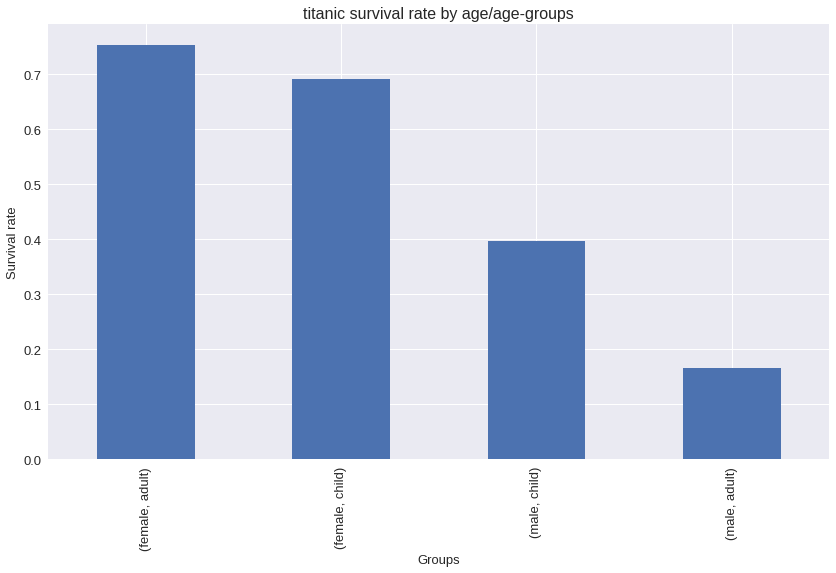

In [36]:
w_and_c_first.plot(kind = 'bar', figsize = (14,8), fontsize = 13)
plt.xlabel('Groups', fontsize = 13)
plt.ylabel('Survival rate', fontsize = 13)
plt.title('titanic survival rate by age/age-groups', fontsize = 16)
plt.show()

## Advanced aggregation with agg()

In [38]:
import pandas as pd
titanic = pd.read_csv('titanic.csv', usecols = ['survived', 'pclass', 'sex', 'age', 'fare'])
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [39]:
titanic.groupby('sex').agg(['mean', 'sum', 'min', 'max'])

survived               ...       fare                            
            mean  sum min max  ...       mean         sum   min       max
sex                            ...                                       
female  0.742038  233   0   1  ...  44.479818  13966.6628  6.75  512.3292
male    0.188908  109   0   1  ...  25.523893  14727.2865  0.00  512.3292

[2 rows x 16 columns]

In [40]:
 titanic.groupby('sex').agg({'survived': ['mean', 'sum'], 'pclass': 'mean', 'age': ['min', 'max']})

survived         pclass   age      
            mean  sum      mean   min   max
sex                                        
female  0.742038  233  2.159236  0.75  63.0
male    0.188908  109  2.389948  0.42  80.0

## transformation with transform()

In [41]:
import pandas as pd
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [43]:
titanic.groupby(['sex', 'pclass']).survived.mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [47]:
titanic.groupby(['sex', 'pclass']).survived.transform('mean')   # group specific survival rate for each passenger

0      0.135447
1      0.968085
2      0.500000
3      0.968085
4      0.135447
         ...   
886    0.157407
887    0.968085
888    0.500000
889    0.368852
890    0.135447
Name: survived, Length: 891, dtype: float64

In [44]:
titanic['group_surv_rate'] = titanic.groupby(['sex', 'pclass']).survived.transform('mean')

In [46]:
titanic['outliers'] = abs(titanic.survived-titanic.group_surv_rate)   # creating outliers column, where outlier value is high, the passenger showed survival rate not belinging to his group

In [48]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_surv_rate,outliers
0,0,3,male,22.0,1,0,7.2500,S,NaN,0.135447,0.135447
1,1,1,female,38.0,1,0,71.2833,C,C,0.968085,0.031915
2,1,3,female,26.0,0,0,7.9250,S,NaN,0.500000,0.500000
3,1,1,female,35.0,1,0,53.1000,S,C,0.968085,0.031915
4,0,3,male,35.0,0,0,8.0500,S,NaN,0.135447,0.135447


In [50]:
titanic[titanic.outliers > 0.85]    # these are all the outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_surv_rate,outliers
36,1,3,male,NaN,0,0,7.2292,C,NaN,0.135447,0.864553
41,0,2,female,27.00,1,0,21.0000,S,NaN,0.921053,0.921053
65,1,3,male,NaN,1,1,15.2458,C,NaN,0.135447,0.864553
74,1,3,male,32.00,0,0,56.4958,S,NaN,0.135447,0.864553
81,1,3,male,29.00,0,0,9.5000,S,NaN,0.135447,0.864553
107,1,3,male,NaN,0,0,7.7750,S,NaN,0.135447,0.864553
125,1,3,male,12.00,1,0,11.2417,C,NaN,0.135447,0.864553
127,1,3,male,24.00,0,0,7.1417,S,NaN,0.135447,0.864553
146,1,3,male,27.00,0,0,7.7958,S,NaN,0.135447,0.864553
165,1,3,male,9.00,0,2,20.5250,S,NaN,0.135447,0.864553


## Replacing NA values by group-specific values

In [52]:
import pandas as pd
titanic = pd.read_csv('titanic.csv')
titanic.head(20)    # has missing values

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [53]:
mean_age = titanic.age.mean()
mean_age

29.69911764705882

In [54]:
titanic.age.fillna(mean_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

let's replace by group specific mean values now


In [56]:
titanic.groupby(['sex', 'pclass']).age.mean()   # very different values

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [59]:
titanic['group_mean_age'] = titanic.groupby(['sex', 'pclass']).age.transform('mean')
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.0,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.0,1,0,71.2833,C,C,34.611765
2,1,3,female,26.0,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.0,1,0,53.1000,S,C,34.611765
4,0,3,male,35.0,0,0,8.0500,S,NaN,26.507589
5,0,3,male,NaN,0,0,8.4583,Q,NaN,26.507589
6,0,1,male,54.0,0,0,51.8625,S,E,41.281386
7,0,3,male,2.0,3,1,21.0750,S,NaN,26.507589
8,1,3,female,27.0,0,2,11.1333,S,NaN,21.750000
9,1,2,female,14.0,1,0,30.0708,C,NaN,28.722973


In [61]:
titanic.age.fillna(titanic.group_mean_age, inplace = True)
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.000000,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.000000,1,0,71.2833,C,C,34.611765
2,1,3,female,26.000000,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.000000,1,0,53.1000,S,C,34.611765
4,0,3,male,35.000000,0,0,8.0500,S,NaN,26.507589
5,0,3,male,26.507589,0,0,8.4583,Q,NaN,26.507589
6,0,1,male,54.000000,0,0,51.8625,S,E,41.281386
7,0,3,male,2.000000,3,1,21.0750,S,NaN,26.507589
8,1,3,female,27.000000,0,2,11.1333,S,NaN,21.750000
9,1,2,female,14.000000,1,0,30.0708,C,NaN,28.722973


In [63]:
titanic.info()   # age has no null values now!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   survived        891 non-null    int64  
 1   pclass          891 non-null    int64  
 2   sex             891 non-null    object 
 3   age             891 non-null    float64
 4   sibsp           891 non-null    int64  
 5   parch           891 non-null    int64  
 6   fare            891 non-null    float64
 7   embarked        889 non-null    object 
 8   deck            203 non-null    object 
 9   group_mean_age  891 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB
